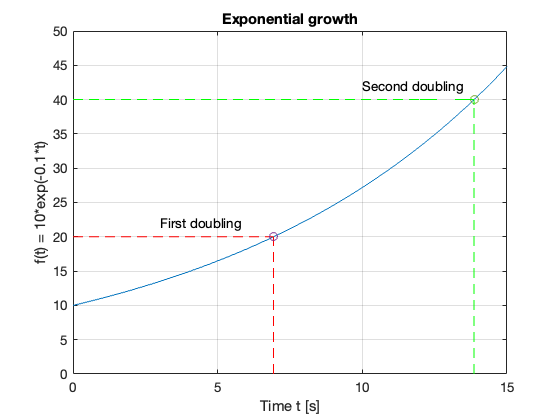

In [1]:
format compact
clear variables
t = linspace(0,15,100);
sigma = 0.1;
% Doubling time
T = log(2)/sigma;
% Plot
plot(t,10*exp(sigma*t)),ylim([0,50]),grid
% Plot and label lines: first doubling
line([T,T],[0,20],'Color','r','LineStyle','--')
line([0,T],[20,20],'Color','r','LineStyle','--')
hold on 
plot(T,20,'o')
text(3,22,'First doubling')
% Plot and label lines: second doubling
plot(2*T,40,'o')
line([2*T,2*T],[0,40],'Color','g','LineStyle','--')
line([0,2*T],[40,40],'Color','g','LineStyle','--')
text(10,42,'Second doubling')
% Label graph
title('Exponential growth'),
ylabel('f(t) = 10*exp(-0.1*t)'),xlabel('Time t [s]')
hold off

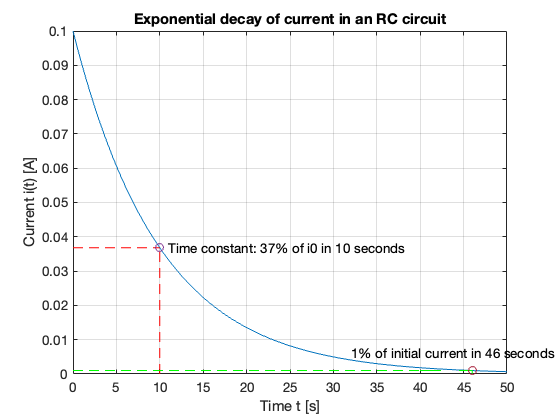

In [2]:
t = linspace(0,50,100);
R = 1e6; C = 10e-6;
sigma = -1/(R*C);
% Time constant and initial current
tau = 1/abs(sigma); i0 = 1/(R*C);
% Plot
plot(t,i0*exp(sigma*t)),grid
% Plot and label lines: time constant
line([tau,tau],[0,i0*exp(-1)],'Color','r','LineStyle','--')
line([0,tau],[i0*exp(-1),i0*exp(-1)],'Color','r','LineStyle','--')
text(tau+1,i0*exp(-1),'Time constant: 37% of i0 in 10 seconds')
hold on 
plot(tau,i0*exp(-1),'o')
% Plot and label lines: 1% point
line([4.6*tau,4.6*tau],[0,0.01*i0],'Color','g','LineStyle','--')
line([0,4.6*tau],[0.01*i0,0.01*i0],'Color','g','LineStyle','--')
plot(4.6*tau,0.01*i0,'o')
text(32,0.01*i0+0.005,'1% of initial current in 46 seconds')
% Label graph
title('Exponential decay of current in an RC circuit'),
ylabel('Current i(t) [A]'),xlabel('Time t [s]')
hold off

In [3]:
syms s t zeta omega_n K Y(s) y(t) 
assume(t > 0)
Y(s) = K/(s^2 + 2*zeta*omega_n*s + omega_n^2)

Y(s) =


K/(omega_n^2 + 2*zeta*omega_n*s + s^2)


In [4]:
y(t) = ilaplace(Y); % The impulse response in the time domain

In [5]:
syms Y_s(s) y_s(t)
zeta = 0.5; omega_n = 10;
X(s) = 1/s;
H(s) = omega_n^2/(s^2 + 2*zeta*omega_n*s + omega_n^2);
Y_s(s) = H(s)*X(s);

In [6]:
% step response 
y_s(t) = ilaplace(Y_s(s));

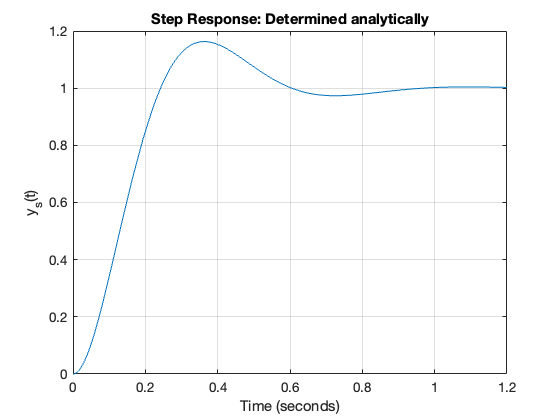

In [7]:
fplot(y_s(t)*heaviside(t),[0,1.2]),ylim([0,1.2]),grid
xlabel('Time (seconds)'),ylabel('y_s(t)'),...
title('Step Response: Determined analytically')

In [8]:
sigma = zeta*omega_n;
omega = omega_n*sqrt(1 - zeta^2);
% Compute response using the formula
t = linspace(0,1.2,100);
yst = (1 - exp(-sigma*t).*(cos(omega*t)+(sigma/omega)*sin(omega*t)));

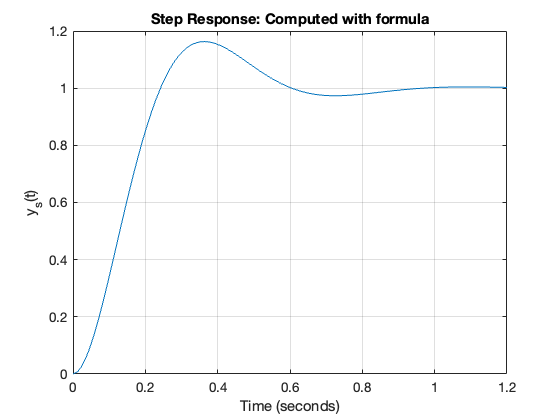

In [9]:
plot(t,yst),grid,...
xlabel('Time (seconds)'),ylabel('y_s(t)'),...
title('Step Response: Computed with formula')

In [10]:
num = omega_n^2; den = [1 2*zeta*omega_n,omega_n^2];
Hs = tf(num,den)


Hs =


        100


  ----------------


  s^2 + 10 s + 100


Continuous-time transfer function.


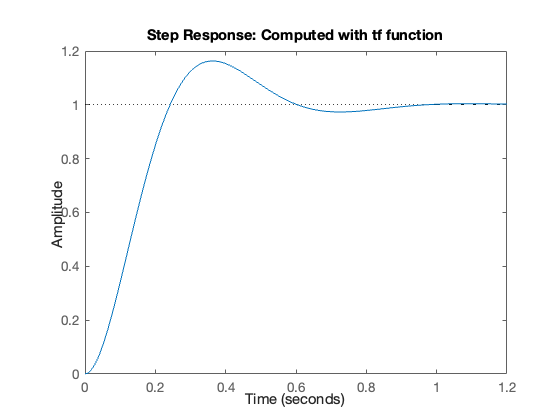

In [11]:
step(Hs),title('Step Response: Computed with tf function')

In [12]:
syms s t
zeta = 0.5; omega_n = 10;
H = omega_n^2/(s^2 + 2*zeta*omega_n*s + omega_n^2)

H =


100/(s^2 + 10*s + 100)


In [13]:
[num,den] = numden(H);
sym_poles = factor(den,'FactorMode','full') % FactorMode needed to reduce quadratic

sym_poles =


[s + 5 + 3^(1/2)*5i, s + 5 - 3^(1/2)*5i]


In [14]:
% Convert symbolic polynomials to numeric polynomials
n = sym2poly(num); d = sym2poly(den);

In [15]:
% Compute the roots
den_poles = roots(d)

den_poles =
  -5.0000 + 8.6603i
  -5.0000 - 8.6603i


In [16]:
Hs = tf(n,d);

In [17]:
poles = pole(Hs)

poles =
  -5.0000 + 8.6603i
  -5.0000 - 8.6603i


In [18]:
[wn,z] = damp(Hs)

wn =
   10.0000
   10.0000


z =
    0.5000
    0.5000


In [19]:
[wn,z,p] = damp(Hs)

wn =
   10.0000
   10.0000


z =
    0.5000
    0.5000


p =
  -5.0000 + 8.6603i
  -5.0000 - 8.6603i


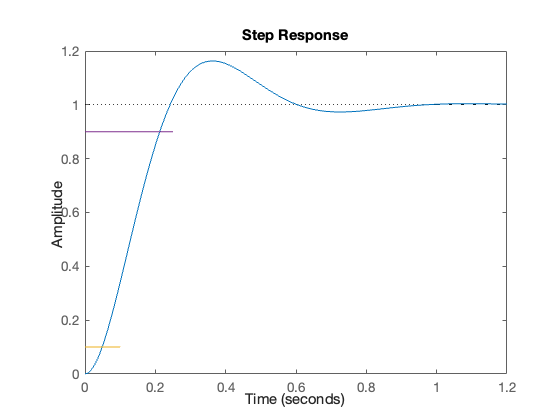

In [20]:
step(Hs),line([0,0.1],[0.1,0.1]),line([0,0.25],[0.9,0.9])

In [21]:
Ts = 4/(zeta*omega_n) % seconds

Ts =
    0.8000


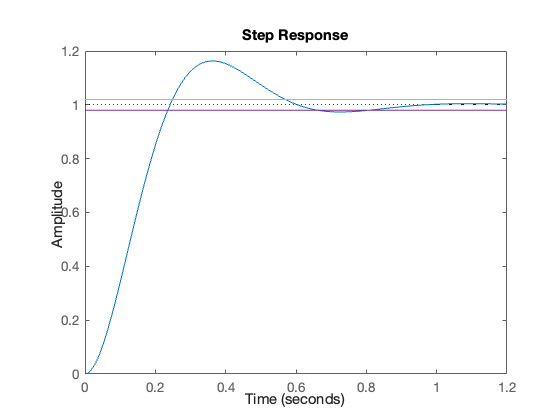

In [22]:
step(Hs),line([0,1.2],[1.02,1.02]),line([0,1.2],[0.98,0.98])

In [23]:
POS = exp(-zeta*pi/sqrt(1 - zeta^2))*100

POS =
   16.3034


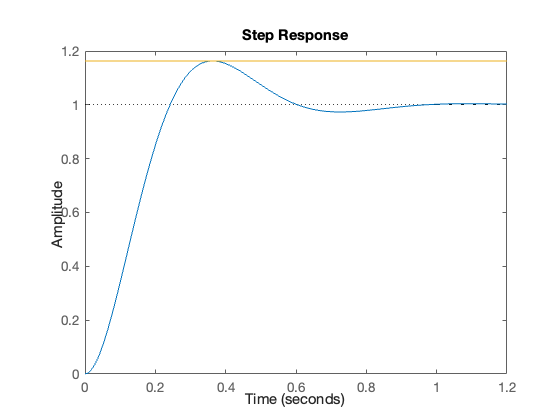

In [24]:
step(Hs),line([0,1.2],[1.16304,1.16304])

In [25]:
z = -log(POS/100)/sqrt(pi^2 + log(POS/100)^2)

z =
    0.5000


In [26]:
Tp = pi/(omega_n*sqrt(1 - zeta^2))

Tp =
    0.3628


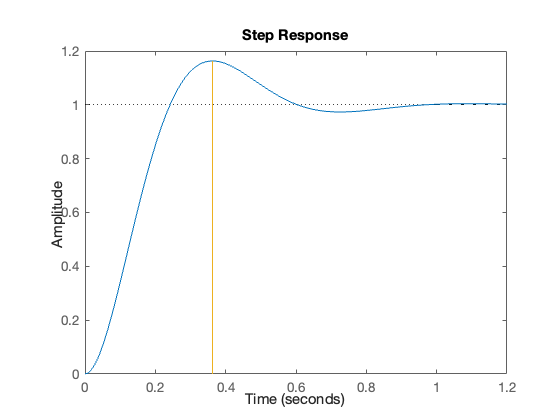

In [27]:
step(Hs),line([Tp,Tp],[0,1.16304])

In [28]:
stepinfo(Hs)

ans = 
  struct with fields:

         RiseTime: 0.1639
    TransientTime: 0.8076
     SettlingTime: 0.8076
      SettlingMin: 0.9315
      SettlingMax: 1.1629
        Overshoot: 16.2929
       Undershoot: 0
             Peak: 1.1629
         PeakTime: 0.3592


In [29]:
z = [-1.5; -3 - 3j; -3 + 3j];
p = [0; 1 + j; 1 - j; -1; -2 + 2j; -2 - 2j; -3];
% Define a transfer function in zero-pole-gain form
Fs = zpk(z,p,1)


Fs =


            (s+1.5) (s^2 + 6s + 18)


  -------------------------------------------


  s (s+1) (s+3) (s^2 - 2s + 2) (s^2 + 4s + 8)


Continuous-time zero/pole/gain model.


In [30]:
tf(Fs)


ans =


                s^3 + 7.5 s^2 + 27 s + 27


  -----------------------------------------------------


  s^7 + 6 s^6 + 13 s^5 + 6 s^4 - 10 s^3 + 40 s^2 + 48 s


Continuous-time transfer function.


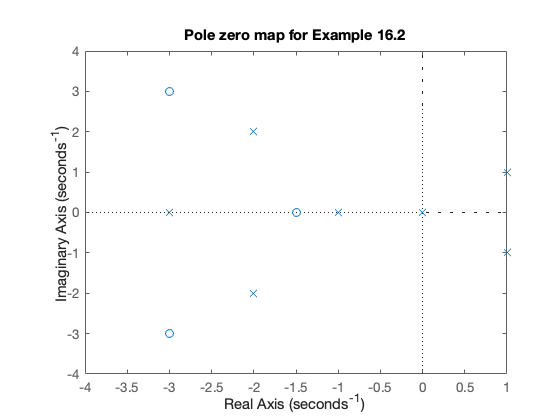

In [31]:
pzmap(Fs),xlim([-4,1]),ylim([-4,4]),title('Pole zero map for Example 16.2')

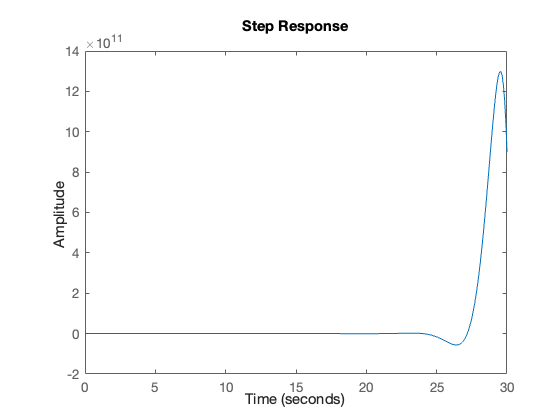

In [32]:
step(Fs)

In [33]:
% Use these symbolic variables
syms m c k
% Replace the NaNs with your expressions
K = NaN;
omega_n = NaN;
zeta = NaN;